<a href="https://colab.research.google.com/github/vkrisvasan/100days_OSL/blob/main/5_OSL_pandas_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#You have used 0 out of 100 requests in free tier
!pip install -qU pandasai pandas langchain langchain-groq -q

In [11]:
import os
import getpass
credential_names = ["PANDASAI_API_KEY","GROQ_API_KEY"]
for credential in credential_names:
  if credential not in os.environ:
    os.environ[credential]=getpass.getpass("Provide your..." + credential)

Provide your...GROQ_API_KEY··········


In [13]:
import os
from google.colab import userdata
from pandasai import SmartDataframe
from langchain_groq.chat_models import ChatGroq
from pandasai.llm import BambooLLM

os.environ['PANDASAI_API_KEY'] = os.getenv("PANDASAI_API_KEY")
llm = ChatGroq(model_name = 'llama3-70b-8192',api_key = os.environ['GROQ_API_KEY'])


#llm = BambooLLM()

In [15]:
import pandas as pd
import numpy as np

# Define the number of portfolios and tools
num_portfolios = 10
num_tools = 7

# Create the portfolio names
portfolios = [f"Portfolio {i}" for i in range(1, num_portfolios + 1)]

# Create the columns with sub-columns for each tool
columns = []
for tool_num in range(1, num_tools + 1):
    columns.append((f"Tool {tool_num}", "Critical"))
    columns.append((f"Tool {tool_num}", "High"))

# Generate random vulnerability data
data = np.random.randint(1, 16, size=(num_portfolios, len(columns)))

# Create a pandas DataFrame with MultiIndex columns
Critical_High_Vulnarability_byPortfolio_DF = pd.DataFrame(data, columns=pd.MultiIndex.from_tuples(columns), index=portfolios)

# Add portfolio names as a column
Critical_High_Vulnarability_byPortfolio_DF.index.name = "Portfolio"
Critical_High_Vulnarability_byPortfolio_DF.reset_index(inplace=True)

# Print the resulting DataFrame
print(Critical_High_Vulnarability_byPortfolio_DF)


      Portfolio   Tool 1        Tool 2        Tool 3        Tool 4       \
                Critical High Critical High Critical High Critical High   
0   Portfolio 1       12    5        4    6       14    9       13    6   
1   Portfolio 2        6    1       13   15        2    9       11    1   
2   Portfolio 3        6    6       13    8        9    3        1   14   
3   Portfolio 4        4    8       15    7       10    1       10   10   
4   Portfolio 5        6   10        2    5       12   12        6   11   
5   Portfolio 6       14    8        1    9       12   10       13    5   
6   Portfolio 7        5   15       10    6        7   15        8    9   
7   Portfolio 8        6    1       14    9        8   11       15    5   
8   Portfolio 9        1    4       10   14       11   13       13    1   
9  Portfolio 10        3   12       12    9       11    2        7    7   

    Tool 5        Tool 6        Tool 7       
  Critical High Critical High Critical High  
0      

In [16]:
#data = pd.read_csv('Dataset/water.csv')
Critical_High_Vulnarability_byPortfolio_DF.head()

Portfolio   Tool 1        Tool 2        Tool 3        Tool 4       \
               Critical High Critical High Critical High Critical High   
0  Portfolio 1       12    5        4    6       14    9       13    6   
1  Portfolio 2        6    1       13   15        2    9       11    1   
2  Portfolio 3        6    6       13    8        9    3        1   14   
3  Portfolio 4        4    8       15    7       10    1       10   10   
4  Portfolio 5        6   10        2    5       12   12        6   11   

    Tool 5        Tool 6        Tool 7       
  Critical High Critical High Critical High  
0       13   10       12    8       15    4  
1        7    3        1   14        2    7  
2       13   15        9    7        9    4  
3        8    3       10   11        2    8  
4        7    7        7   10        5    9

In [21]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

# Open the spreadsheet (create it if it doesn't exist)
try:
    sh = gc.open('My Sheet') # Replace 'My Sheet' with your desired sheet name
except gspread.exceptions.SpreadsheetNotFound:
    sh = gc.create('My Sheet') # Replace 'My Sheet' with your desired sheet name

# Select the first worksheet
worksheet = sh.sheet1

# Convert MultiIndex columns to single-level column names
Critical_High_Vulnarability_byPortfolio_DF.columns = ['_'.join(col) for col in Critical_High_Vulnarability_byPortfolio_DF.columns]

# Convert the DataFrame to a list of lists for writing to the sheet
data_for_sheet = [Critical_High_Vulnarability_byPortfolio_DF.columns.tolist()] + Critical_High_Vulnarability_byPortfolio_DF.values.tolist()

# Update the sheet with the data
worksheet.update('A1', data_for_sheet)

<ipython-input-21-353892a0525e>:26: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  worksheet.update('A1', data_for_sheet)


{'spreadsheetId': '1zMCyozQ-oYl21K_n5Bi7P_Yx6caEm2-Ttno4Gw13nOE',
 'updatedRange': 'Sheet1!A1:O11',
 'updatedRows': 11,
 'updatedColumns': 15,
 'updatedCells': 165}

In [22]:
# Convert to SmartDataframe
sdf = SmartDataframe(Critical_High_Vulnarability_byPortfolio_DF, config={"llm": llm})

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 171, in execute_code
    exec(code, environment)
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/pandasai/safe_libs/base_restricted_module.py", line 10, in wrapper
    raise SecurityError(
pandasai.safe_libs.base_restricted_module.SecurityError: Potential security risk: 'Critical Tools by Portfolio' is not allowed

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
  File "/usr/local/lib/python3.10/dist-

Unfortunately, I was not able to answer your question, because of the following error:

'tight_layout' is not allowed in RestrictedMatplotlib



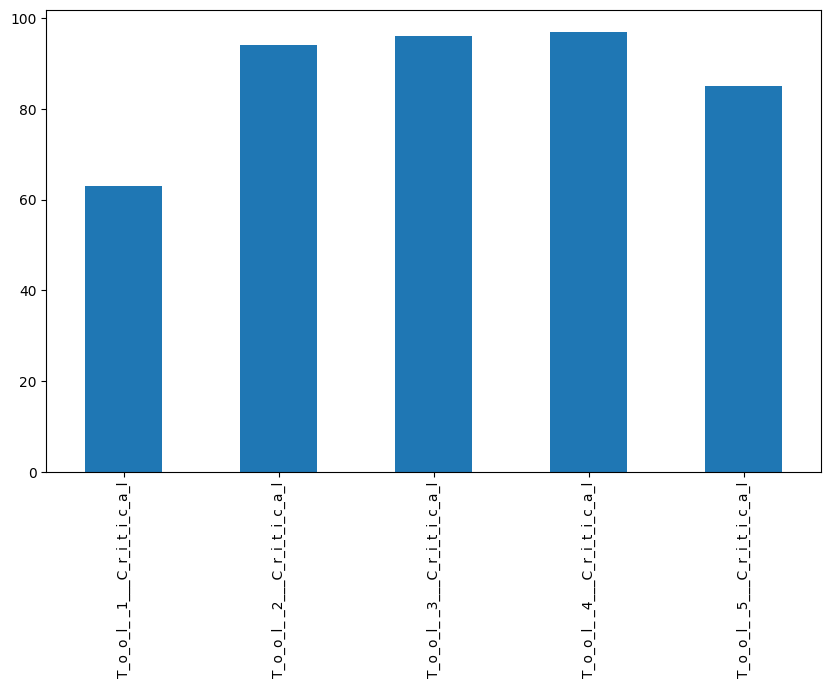

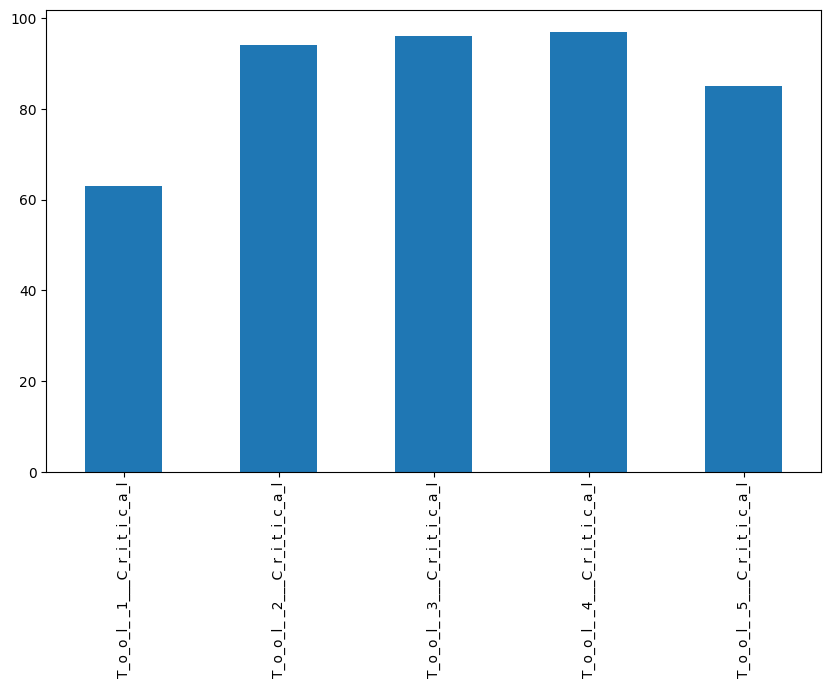

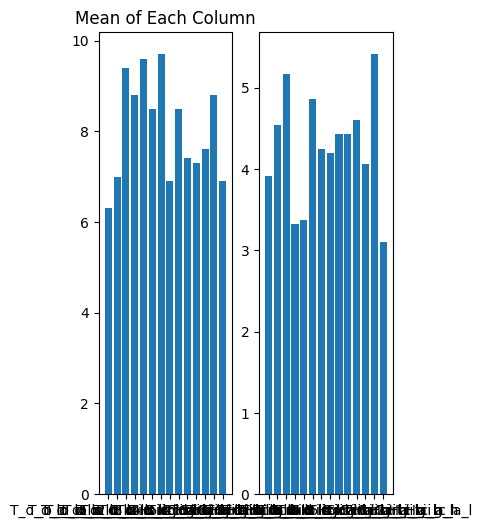

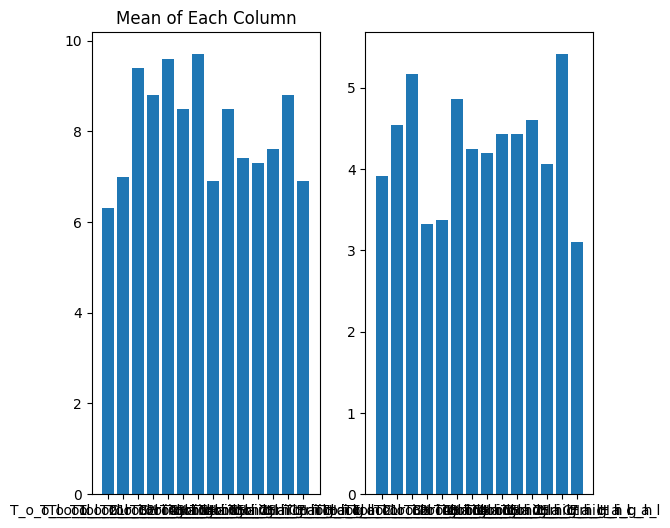

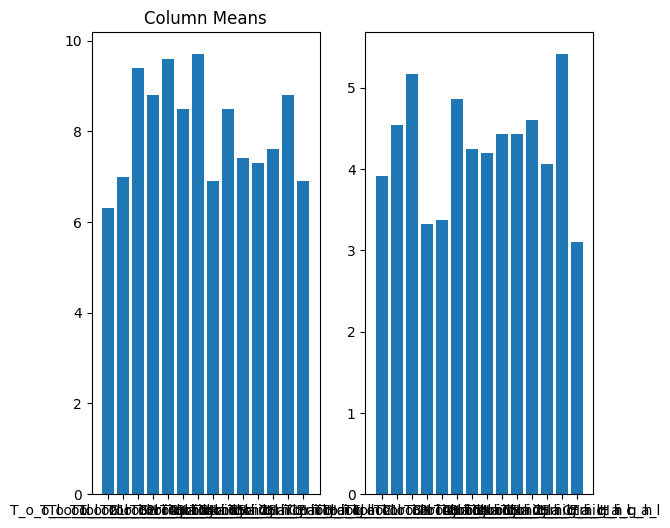

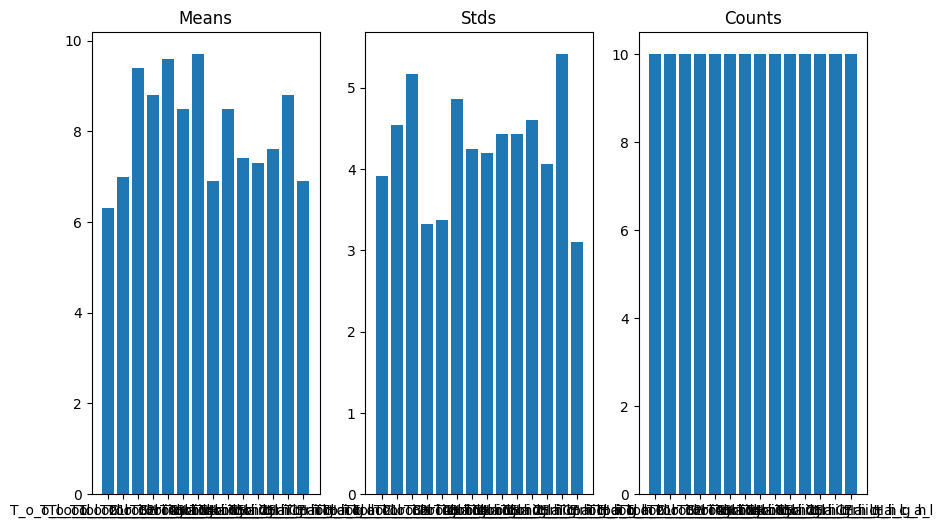

In [25]:
sdf.chat('crete a summary of the data with 5 exec level chart and 5 text observatrions ')
response = sdf.chat('crete a summary of the data with  5 text observatrions ')
print(response)

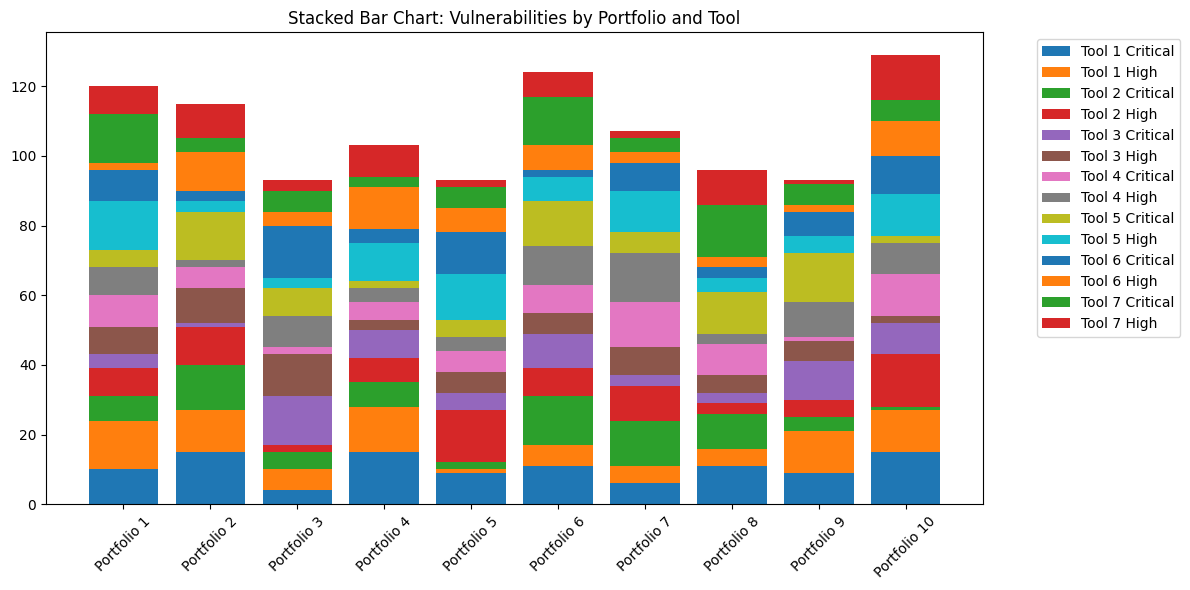

<ipython-input-26-e0b9eb35762d>:38: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  heatmap_data = df.sum(axis=1, level=0)


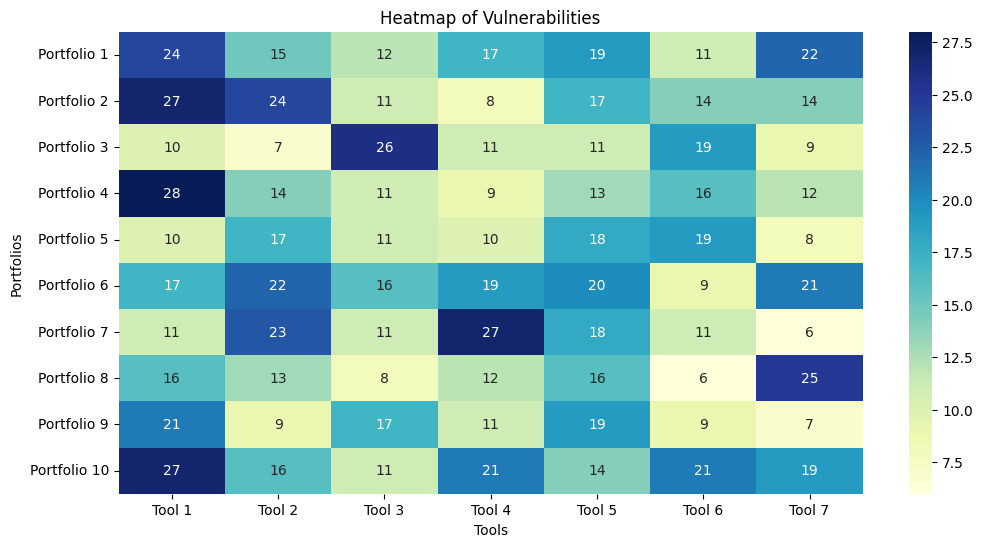

<ipython-input-26-e0b9eb35762d>:47: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  portfolio_1_totals = df.loc["Portfolio 1"].sum(level=1)


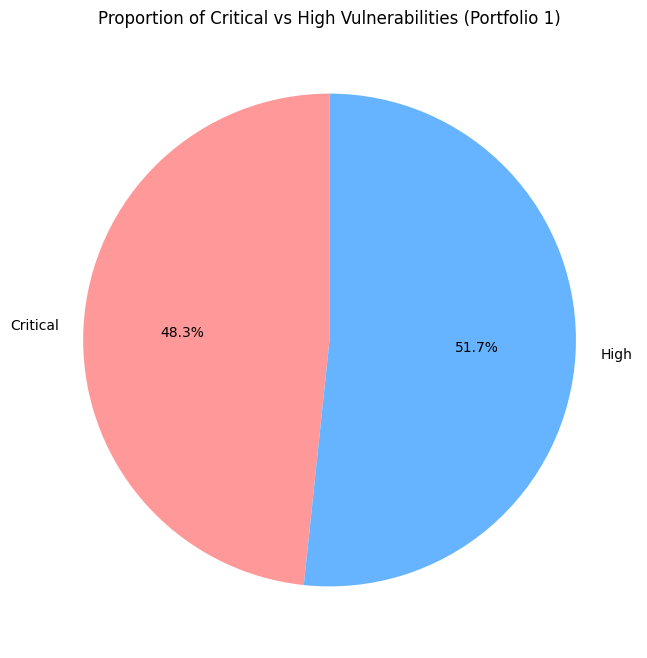

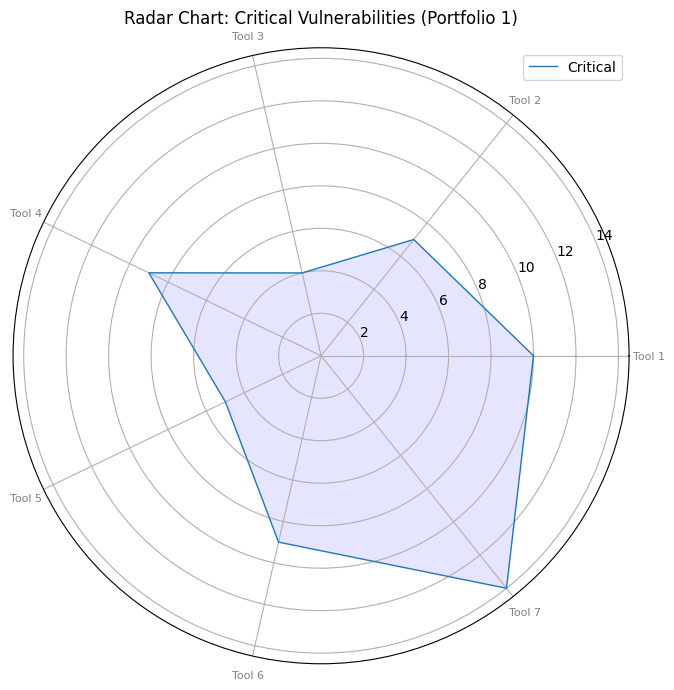

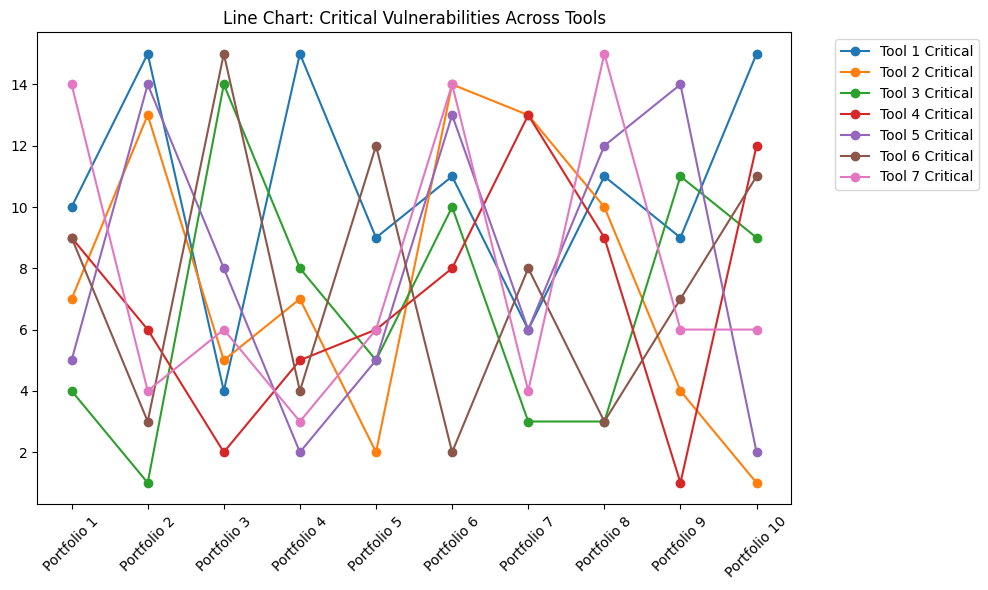

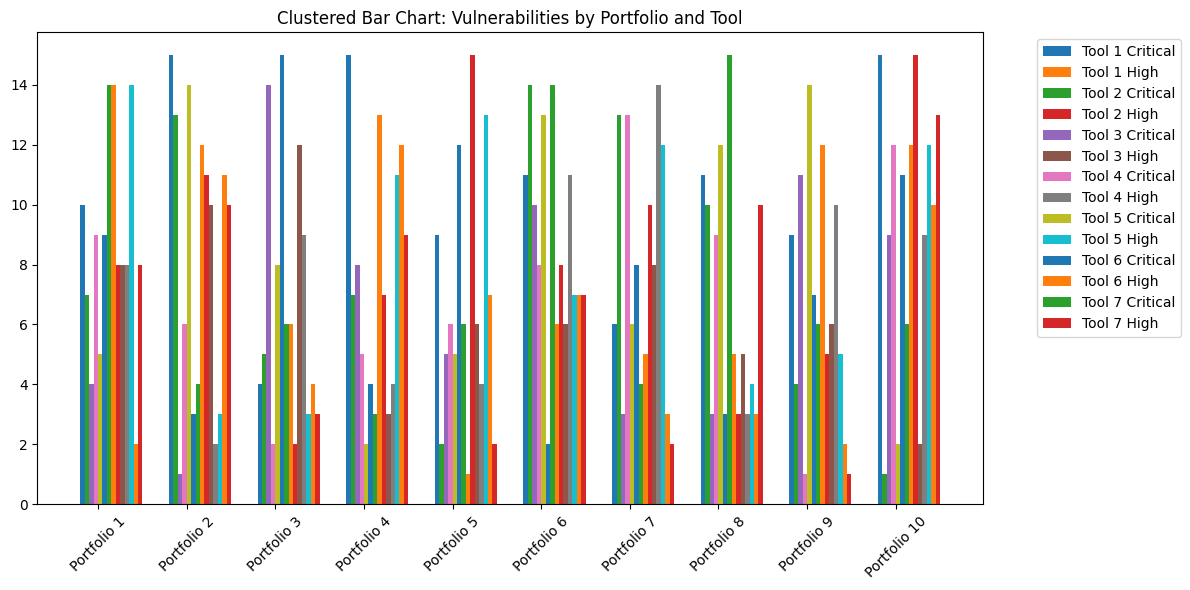

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the dataset
num_portfolios = 10
num_tools = 7

portfolios = [f"Portfolio {i}" for i in range(1, num_portfolios + 1)]
columns = [(f"Tool {i}", "Critical") for i in range(1, num_tools + 1)] + [(f"Tool {i}", "High") for i in range(1, num_tools + 1)]
data = np.random.randint(1, 16, size=(num_portfolios, len(columns)))

df = pd.DataFrame(data, columns=pd.MultiIndex.from_tuples(columns), index=portfolios)
df.index.name = "Portfolio"

# Separate data for charts
critical_totals = df.xs("Critical", level=1, axis=1)
high_totals = df.xs("High", level=1, axis=1)

# Chart 1: Stacked Bar Chart
plt.figure(figsize=(12, 6))
for i, tool in enumerate(critical_totals.columns):
    plt.bar(critical_totals.index, critical_totals[tool],
            bottom=critical_totals.iloc[:, :i].sum(axis=1) + high_totals.iloc[:, :i].sum(axis=1),
            label=f"{tool} Critical")
    plt.bar(high_totals.index, high_totals[tool],
            bottom=critical_totals.iloc[:, :i+1].sum(axis=1) + high_totals.iloc[:, :i].sum(axis=1),
            label=f"{tool} High")
plt.xticks(rotation=45)
plt.title("Stacked Bar Chart: Vulnerabilities by Portfolio and Tool")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Chart 2: Heatmap
plt.figure(figsize=(12, 6))
heatmap_data = df.sum(axis=1, level=0)
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Vulnerabilities")
plt.xlabel("Tools")
plt.ylabel("Portfolios")
plt.show()

# Chart 3: Pie Chart (for Portfolio 1)
plt.figure(figsize=(8, 8))
portfolio_1_totals = df.loc["Portfolio 1"].sum(level=1)
plt.pie(portfolio_1_totals, labels=portfolio_1_totals.index, autopct='%1.1f%%', startangle=90, colors=["#FF9999", "#66B3FF"])
plt.title("Proportion of Critical vs High Vulnerabilities (Portfolio 1)")
plt.show()

# Chart 4: Radar Chart (for Portfolio 1)
from math import pi
categories = critical_totals.columns
values = critical_totals.loc["Portfolio 1"].tolist() + [critical_totals.loc["Portfolio 1"].tolist()[0]]
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))] + [0]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Critical")
ax.fill(angles, values, 'b', alpha=0.1)
plt.title("Radar Chart: Critical Vulnerabilities (Portfolio 1)")
plt.legend()
plt.show()

# Chart 5: Line Chart
plt.figure(figsize=(10, 6))
for tool in critical_totals.columns:
    plt.plot(critical_totals.index, critical_totals[tool], marker='o', label=f"{tool} Critical")
plt.xticks(rotation=45)
plt.title("Line Chart: Critical Vulnerabilities Across Tools")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Chart 6: Clustered Bar Chart
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35
x = np.arange(len(critical_totals.index))

for i, tool in enumerate(critical_totals.columns):
    ax.bar(x - width / 2 + (i * width / num_tools), critical_totals[tool], width / num_tools, label=f"{tool} Critical")
    ax.bar(x + width / 2 + (i * width / num_tools), high_totals[tool], width / num_tools, label=f"{tool} High")

ax.set_xticks(x)
ax.set_xticklabels(critical_totals.index, rotation=45)
plt.title("Clustered Bar Chart: Vulnerabilities by Portfolio and Tool")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-27-7cc87c1e6b06>:25: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  heatmap_data = df.sum(axis=1, level=0)


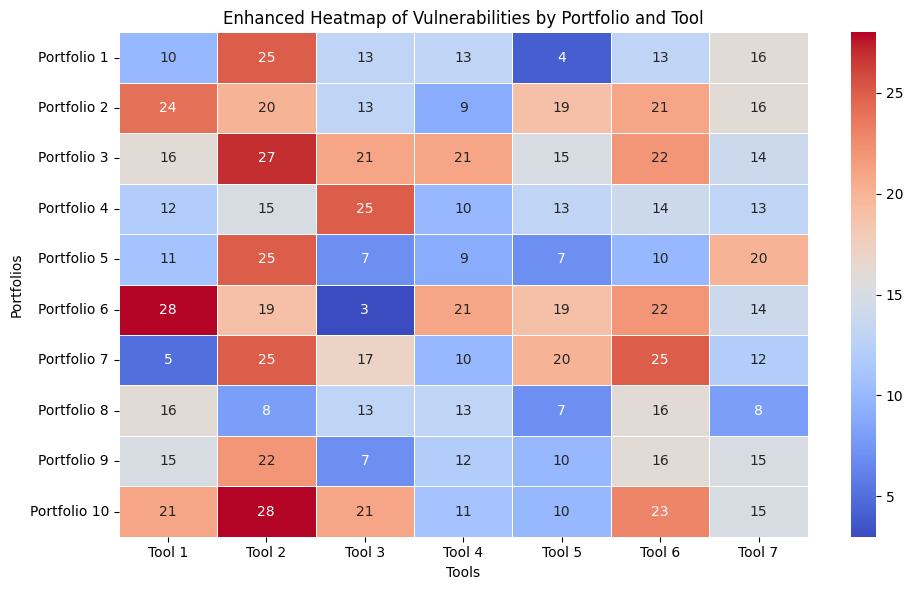

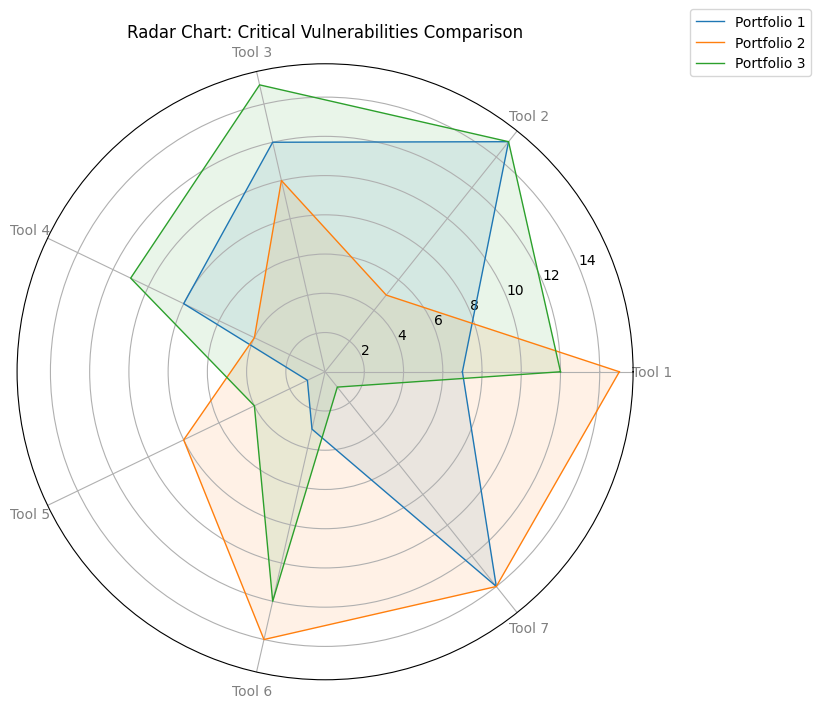

<ipython-input-27-7cc87c1e6b06>:62: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().



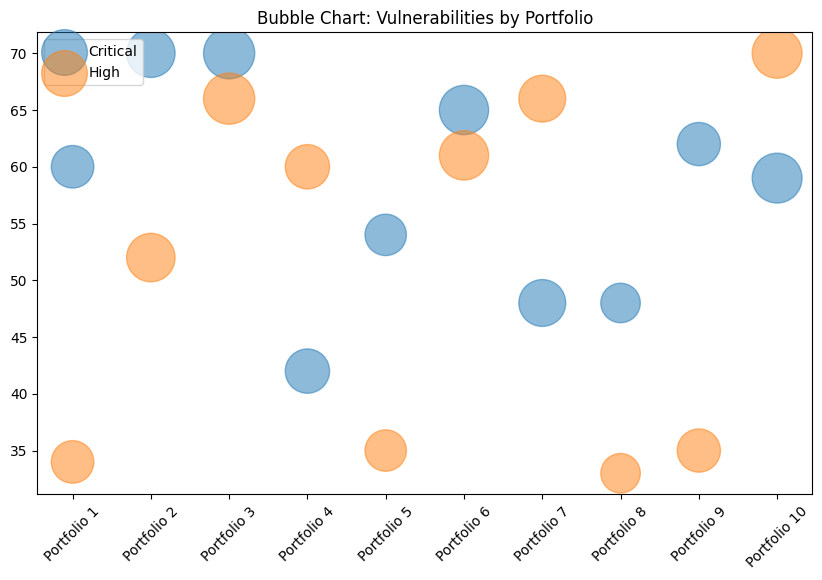

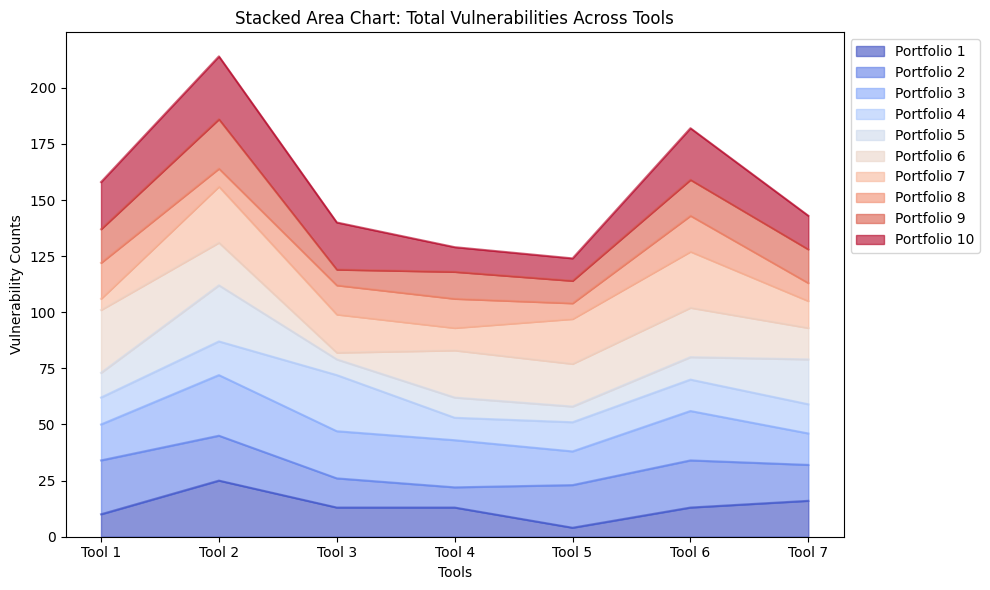

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from math import pi

# Generate the dataset
num_portfolios = 10
num_tools = 7

portfolios = [f"Portfolio {i}" for i in range(1, num_portfolios + 1)]
columns = [(f"Tool {i}", "Critical") for i in range(1, num_tools + 1)] + [(f"Tool {i}", "High") for i in range(1, num_tools + 1)]
data = np.random.randint(1, 16, size=(num_portfolios, len(columns)))

df = pd.DataFrame(data, columns=pd.MultiIndex.from_tuples(columns), index=portfolios)
df.index.name = "Portfolio"

# Separate data
critical_totals = df.xs("Critical", level=1, axis=1)
high_totals = df.xs("High", level=1, axis=1)

# Chart 1: Enhanced Heatmap
plt.figure(figsize=(10, 6))
heatmap_data = df.sum(axis=1, level=0)
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.title("Enhanced Heatmap of Vulnerabilities by Portfolio and Tool")
plt.xlabel("Tools")
plt.ylabel("Portfolios")
plt.tight_layout()
plt.show()

# Chart 2: Sunburst Chart
sunburst_data = df.stack(level=0).reset_index()
sunburst_data.columns = ["Portfolio", "Tool", "Category", "Count"]
fig = px.sunburst(
    sunburst_data,
    path=["Portfolio", "Tool", "Category"],
    values="Count",
    color="Count",
    color_continuous_scale="Viridis",
    title="Sunburst Chart: Vulnerabilities Breakdown by Portfolio, Tool, and Category"
)
fig.show()

# Chart 3: Enhanced Radar Chart
categories = critical_totals.columns
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))] + [0]

plt.figure(figsize=(8, 8))
for i, portfolio in enumerate(critical_totals.index[:3]):  # Compare first 3 portfolios
    values = critical_totals.loc[portfolio].tolist() + [critical_totals.loc[portfolio].tolist()[0]]
    ax = plt.subplot(111, polar=True)
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=portfolio)
    ax.fill(angles, values, alpha=0.1)
plt.xticks(angles[:-1], categories, color='grey', size=10)
plt.title("Radar Chart: Critical Vulnerabilities Comparison")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.show()

# Chart 4: Bubble Chart
bubble_data = df.sum(axis=1, level=1).reset_index()
bubble_data["Total"] = bubble_data["Critical"] + bubble_data["High"]

plt.figure(figsize=(10, 6))
plt.scatter(bubble_data["Portfolio"], bubble_data["Critical"], s=bubble_data["Total"] * 10, alpha=0.5, label="Critical")
plt.scatter(bubble_data["Portfolio"], bubble_data["High"], s=bubble_data["Total"] * 10, alpha=0.5, label="High")
plt.xticks(rotation=45)
plt.title("Bubble Chart: Vulnerabilities by Portfolio")
plt.legend()
plt.show()

# Chart 5: Stacked Area Chart
area_data = critical_totals.add(high_totals)
area_data.index.name = "Portfolio"
area_data.columns = [f"Tool {i}" for i in range(1, num_tools + 1)]

area_data.T.plot.area(figsize=(10, 6), alpha=0.6, colormap="coolwarm")
plt.title("Stacked Area Chart: Total Vulnerabilities Across Tools")
plt.xlabel("Tools")
plt.ylabel("Vulnerability Counts")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [28]:
import plotly.express as px

# Prepare data for the sunburst chart
sunburst_data = df.stack(level=0).reset_index()
sunburst_data.columns = ["Portfolio", "Tool", "Category", "Count"]

# Add total vulnerabilities for tooltip insights
sunburst_data['Total Vulnerabilities'] = sunburst_data.groupby('Portfolio')['Count'].transform('sum')

# Create the sunburst chart
fig = px.sunburst(
    sunburst_data,
    path=["Portfolio", "Tool", "Category"],
    values="Count",
    color="Count",
    color_continuous_scale=["#ff0000", "#ff6347", "#ffa07a"],
    hover_data={"Count": True, "Total Vulnerabilities": True},
    title="Enhanced Sunburst Chart: Vulnerabilities Breakdown"
)
fig.update_traces(
    hovertemplate="<b>%{label}</b><br>Count: %{value}<br>Total Vulnerabilities: %{customdata[1]}"
)
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


In [29]:
import plotly.graph_objects as go

# Select portfolios to compare (dynamic dropdown can be added)
portfolios_to_compare = ["Portfolio 1", "Portfolio 2", "Portfolio 3"]

# Prepare data for radar chart
categories = critical_totals.columns.tolist()

# Create radar traces for each portfolio
fig = go.Figure()

for portfolio in portfolios_to_compare:
    values = critical_totals.loc[portfolio].tolist()
    values.append(values[0])  # Close the radar chart
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories + [categories[0]],
        fill='toself',
        name=portfolio,
        mode='markers+lines',
        marker=dict(size=6),
        line=dict(width=2)
    ))

# Add an average line for comparison
avg_values = critical_totals.mean(axis=0).tolist()
avg_values.append(avg_values[0])
fig.add_trace(go.Scatterpolar(
    r=avg_values,
    theta=categories + [categories[0]],
    fill='none',
    name='Average',
    line=dict(dash='dash', color='black', width=2)
))

# Update layout for better readability
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, max(critical_totals.max()) + 5]),
        angularaxis=dict(rotation=90)
    ),
    title="Enhanced Radar Chart: Critical Vulnerabilities Comparison",
    showlegend=True,
    legend=dict(orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5)
)

fig.show()
